In [ ]:
import os, sys

os.getcwd()

In [61]:
# Import libraries and dataframes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = "ftse" # Values: asset_class, sectors, ftse

quant_res_df = pd.read_csv("ResultCSVs/grphcolor_quant_%s_res.csv" % (dataset))
class_res_df = pd.read_csv("ResultCSVs/grphcolor_class_%s_res.csv" % (dataset))

quant_res_df = quant_res_df.drop(axis=1, columns=['Unnamed: 0'])
class_res_df = class_res_df.drop(axis=1, columns=['Unnamed: 0'])

In [43]:
quant_res_df.shape

(100, 6)

In [44]:
quant_res_df.columns

Index(['date', 'threshold', 'density', 'coloring', 'num_colors',
       'valid_coloring'],
      dtype='object')

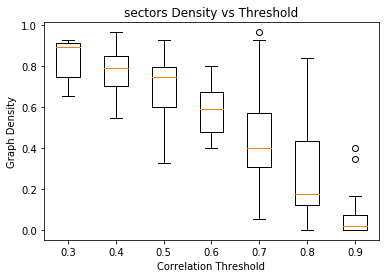

In [40]:
# Plot graph density for each threshold. 

thresh_array = quant_res_df['threshold'].unique()

density_distr = []

for thresh in thresh_array:
    density = quant_res_df[quant_res_df.threshold == thresh]['density']
    density_distr.append(density)
    
plt.boxplot(density_distr, labels=[float('%.2f'%x) for x in thresh_array])
plt.ylabel("Graph Density")
plt.xlabel("Correlation Threshold")
plt.title("%s Density vs Threshold" % (dataset))
plt.show()

In [45]:
[float('%.2f'%x) for x in thresh_array]

[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

<Figure size 432x288 with 0 Axes>

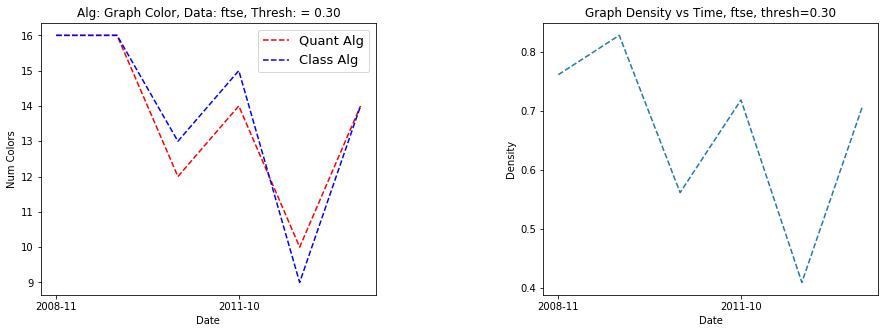

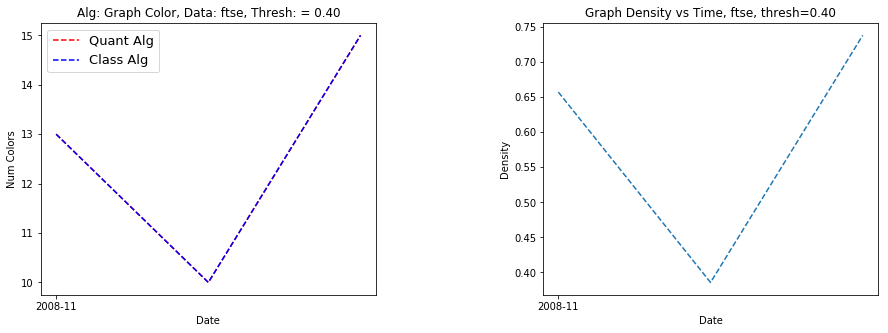

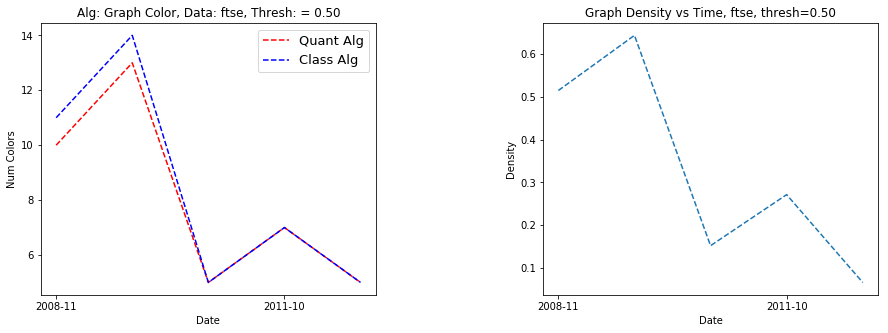

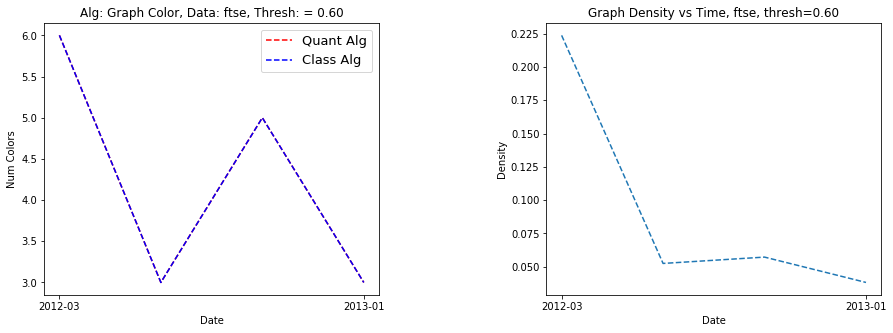

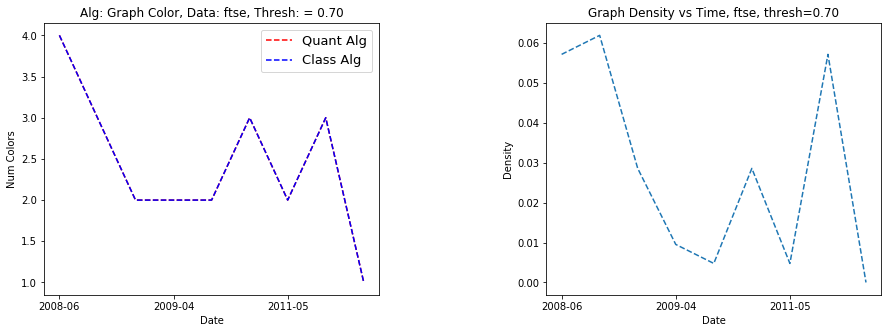

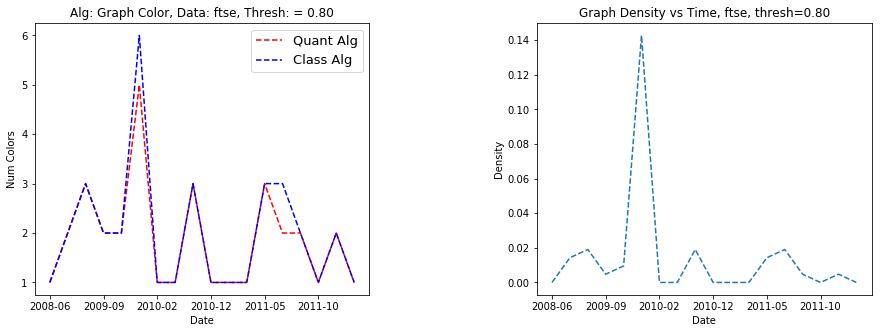

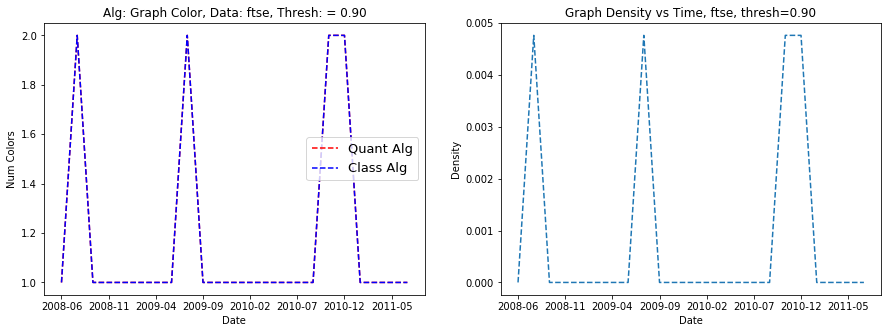

In [62]:
# Plot score vs time for each threshold
thresholds = quant_res_df['threshold'].unique()

i = 1
for thresh in thresholds:
    quant_series = quant_res_df[(quant_res_df.threshold == thresh) & (quant_res_df.valid_coloring == True)]
    class_series = class_res_df[(class_res_df.threshold == thresh) & (class_res_df.valid_coloring == True)]
    class_series = class_series[class_series['date'].isin(quant_series['date'])]
    
    assert quant_series.shape == class_series.shape
    
    fig = plt.figure(i)
    plt.subplots_adjust(wspace=0.5)
    plt.subplots(figsize=(15,5))
    
    plt.subplot(121)
    plt.title('Alg: Graph Color, Data: %s, Thresh: = %.2f' % (dataset, thresh))
    plt.ylabel('Num Colors')
    plt.xlabel('Date')
    
    plt.plot(quant_series['date'], quant_series['num_colors'], 'r--', label='Quant Alg')
    plt.plot(quant_series['date'], class_series['num_colors'], 'b--', label='Class Alg')
    plt.legend(loc=0, prop={'size': 13})
    plt.xticks(ticks=quant_series['date'][::3], 
              labels=[x[0:7] for x in quant_series['date']])
    
    plt.subplot(122)
    plt.title('Graph Density vs Time, %s, thresh=%.2f' % (dataset, thresh))
    plt.plot(quant_series['date'], quant_series['density'], '--')
    plt.xticks(ticks=quant_series['date'][::3], 
               labels=[x[0:7] for x in quant_series['date']])
    plt.ylabel("Density")
    plt.xlabel("Date")
    
    plt.savefig('../ReportFiguresPlots/GraphColor/gc_%s_score_density_thresh_%d.png' % 
                (dataset, int(thresh*10)))
    
    i += 1

In [ ]:
assert all_class_df.date.equals(all_quant_df.date)

In [27]:
all_quant_df = all_quant_df.groupby(["density"])["num_colors"].mean()

In [31]:
all_class_df = all_class_df.groupby(['density'])['num_colors'].mean()

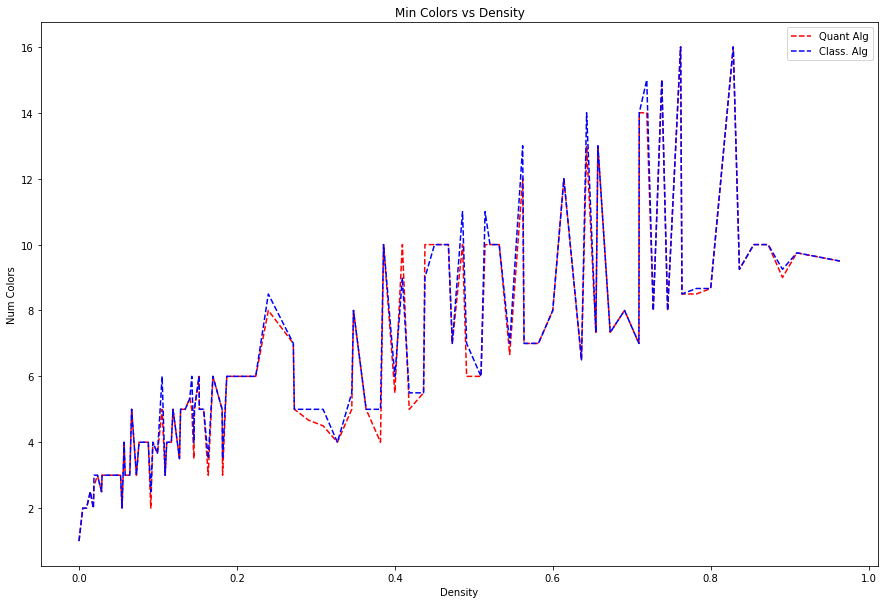

In [39]:
fig = plt.figure(1, figsize=(15,10))
plt.plot(all_quant_df, 'r--', label='Quant Alg')
plt.plot(all_class_df, 'b--', label='Class. Alg')
plt.title("Min Colors vs Density")
plt.ylabel("Num Colors")
plt.xlabel("Density")
plt.legend(loc=0)
plt.show()
fig.savefig("../ReportFiguresPlots/mincolor_density_all")